In [24]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, GRU, Input
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
from transformers import T5Tokenizer, T5ForConditionalGeneration


# 1. MLP (Perceptrón Multicapa)

In [25]:
def create_mlp_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# 2. CNN (Red Neuronal Convolucional)

In [26]:
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# 3. LSTM


In [27]:
def create_lstm_model(timesteps, features):
    model = Sequential()
    model.add(LSTM(50, input_shape=(timesteps, features)))
    model.add(Dense(10, activation='softmax'))
    return model


# 4. GRU

In [28]:
def create_gru_model(timesteps, features):
    model = Sequential()
    model.add(GRU(50, input_shape=(timesteps, features)))
    model.add(Dense(10, activation='softmax'))
    return model


# 5. Autoencoder

In [29]:
def create_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(input_layer, decoded)
    return autoencoder


# 6. Transformer (T5)

In [30]:
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Función para usar el modelo T5
def use_transformer(text):
    # Tokenizar el texto de entrada
    input_ids = tokenizer.encode(text, return_tensors="pt")
    
    # Generar la traducción
    output = model.generate(input_ids)
    
    # Decodificar el resultado
    translation = tokenizer.decode(output[0], skip_special_tokens=True)
    
    return translation

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, GRU, Input
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
from transformers import T5Tokenizer, T5ForConditionalGeneration


# Cargar dataset de MNIST

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# MLP

In [33]:
mlp_model = create_mlp_model(input_dim=784)
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(x_train.reshape(-1, 784), y_train, epochs=5, verbose=0)
mlp_results = mlp_model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# CNN

In [34]:
cnn_model = create_cnn_model(input_shape=(28, 28, 1))
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train, y_train, epochs=5, verbose=0)
cnn_results = cnn_model.evaluate(x_test, y_test, verbose=0)

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# LSTM (usaremos una secuencia simulada)

In [35]:
timesteps = 10  # Número de pasos de tiempo
features = 28   # Número de características (28 para imágenes de 28x28)

# Aplanar las imágenes y preparar los datos de entrada
x_lstm = x_train.reshape(-1, 28, 28)  # Redimensionar a (n_samples, timesteps=28, features=28)
x_lstm = x_lstm[:, :timesteps, :]  # Tomar solo los primeros 10 pasos

# Asegurarse de que y_lstm esté alineado con x_lstm
y_lstm = y_train[:x_lstm.shape[0]]  # Alinear y_lstm con el número de muestras en x_lstm


In [36]:
x_test_lstm = x_test.reshape(-1, 28, 28)  # Redimensionar a (n_samples, timesteps=28, features=28)
x_test_lstm = x_test_lstm[:len(x_test_lstm) // timesteps * timesteps]  # Asegurarse de que sea múltiplo de 10
y_test_lstm = y_test[:len(x_test_lstm)]  # Alinear y_test

# LSTM
lstm_model = create_lstm_model(timesteps=timesteps, features=features)
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(x_lstm.reshape(-1, timesteps, features), y_lstm, epochs=5, verbose=0)

# Evaluar el modelo LSTM
lstm_results = lstm_model.evaluate(x_test_lstm, y_test_lstm, verbose=0)

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# GRU

In [37]:
# Preparar los datos para el GRU
timesteps = 10  # Número de pasos de tiempo
features = 28   # Número de características (28 para imágenes de 28x28)

# Aplanar las imágenes y preparar los datos de entrada
x_gru = x_train.reshape(-1, 28, 28)  # Redimensionar a (n_samples, timesteps=28, features=28)
x_gru = x_gru[:, :timesteps, :]  # Tomar solo los primeros 10 pasos

# Asegurarse de que y_gru esté alineado con x_gru
y_gru = y_train[:x_gru.shape[0]]  # Alinear y_gru con el número de muestras en x_gru

# Preparar x_test para el GRU
x_test_gru = x_test.reshape(-1, 28, 28)  # Redimensionar a (n_samples, timesteps=28, features=28)

# Tomar solo un número de muestras que sea un múltiplo de timesteps (en este caso 10)
num_samples_gru = len(x_test_gru) // timesteps * timesteps
x_test_gru = x_test_gru[:num_samples_gru]  # Asegúrate de que sea múltiplo de 10
y_test_gru = y_test[:len(x_test_gru)]

In [38]:
gru_model = create_gru_model(timesteps=timesteps, features=features)
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
gru_model.fit(x_gru.reshape(-1, timesteps, features), y_gru, epochs=5, verbose=0)

# Evaluar el modelo GRU
gru_results = gru_model.evaluate(x_test_gru, y_test_gru, verbose=0)

# Autoencoder

In [39]:
autoencoder = create_autoencoder(input_dim=784)
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())
autoencoder.fit(x_train.reshape(-1, 784), x_train.reshape(-1, 784), epochs=5, verbose=0)
autoencoder_results = autoencoder.evaluate(x_test.reshape(-1, 784), x_test.reshape(-1, 784), verbose=0)

# Uso del Transformer

In [40]:
transformer_output = use_transformer("Translate English to French: How are you?")
print(transformer_output)

Comment êtes-vous?


# Resultados

In [41]:
results = {
    'MLP Accuracy': mlp_results[1],
    'CNN Accuracy': cnn_results[1],
    'LSTM Accuracy': lstm_results[1],
    'GRU Accuracy': gru_results[1],
    'Autoencoder Loss': autoencoder_results,
    'Transformer Output': transformer_output
}


# Mostrar resultados

In [42]:
for model_name, result in results.items():
    print(f"{model_name}: {result}")

MLP Accuracy: 0.9739999771118164
CNN Accuracy: 0.9919999837875366
LSTM Accuracy: 0.08100000023841858
GRU Accuracy: 0.14429999887943268
Autoencoder Loss: 0.004161817952990532
Transformer Output: Comment êtes-vous?


# Visualizar resultados (opcional)

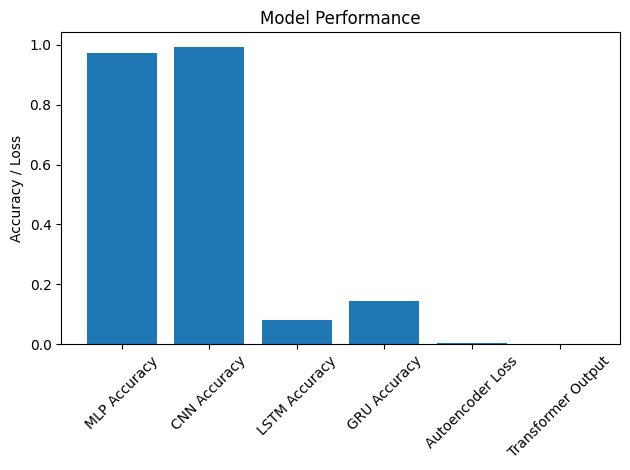

In [43]:
fig, ax = plt.subplots()
ax.bar(results.keys(), [r if isinstance(r, float) else 0 for r in results.values()])
ax.set_ylabel('Accuracy / Loss')
ax.set_title('Model Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()